Image dimensions: (450, 620, 3)


(-0.5, 619.5, 449.5, -0.5)

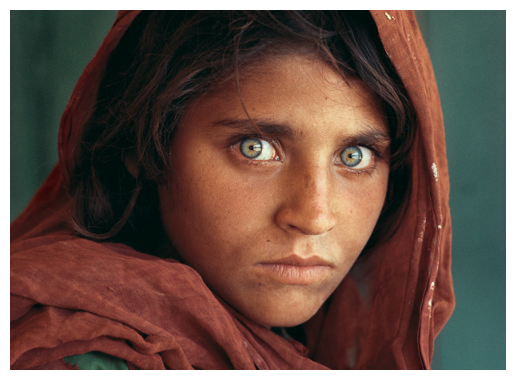

In [9]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = imread('afghan.jpg')

print('Image dimensions:', img.shape)

plt.figure()
plt.imshow(img)
plt.axis('off')

In [10]:
def apply_threshold(fft_channel, threshold):
    # Find the magnitude
    magnitude = np.abs(fft_channel)
    # Find the threshold value
    threshold_value = np.percentile(magnitude, (1 - threshold) * 100)
    # Zero out small coefficients
    fft_channel[magnitude < threshold_value] = 0
    return fft_channel

def compress_image_fourier(img, threshold=0.1):
    # Compute the 2D Fourier Transform of each of the RGB channels
    fft_red = np.fft.fft2(img[:, :, 0])
    fft_green = np.fft.fft2(img[:, :, 1])
    fft_blue = np.fft.fft2(img[:, :, 2])
    
    # Shift the zero-frequency component to the center
    fft_red_shifted = np.fft.fftshift(fft_red)
    fft_green_shifted = np.fft.fftshift(fft_green)
    fft_blue_shifted = np.fft.fftshift(fft_blue)
    
    # Apply the thresholding function to each channel
    fft_red_thresholded = apply_threshold(fft_red_shifted, threshold)
    fft_green_thresholded = apply_threshold(fft_green_shifted, threshold)
    fft_blue_thresholded = apply_threshold(fft_blue_shifted, threshold)
    
    # Inverse shift to move the zero-frequency component back to the original position
    fft_red = np.fft.ifftshift(fft_red_thresholded)
    fft_green = np.fft.ifftshift(fft_green_thresholded)
    fft_blue = np.fft.ifftshift(fft_blue_thresholded)
    
    # Reconstruct the image from the inverse FFT of the thresholded coefficients
    img_reconstructed_red = np.fft.ifft2(fft_red).real
    img_reconstructed_green = np.fft.ifft2(fft_green).real
    img_reconstructed_blue = np.fft.ifft2(fft_blue).real
    
    # Stack the channels back into an RGB image
    img_reconstructed = np.stack((img_reconstructed_red, img_reconstructed_green, img_reconstructed_blue), axis=-1)
    
    # Ensure the reconstructed image has values within the correct range for display
    img_reconstructed = np.clip(img_reconstructed, 0, 255).astype('uint8')
    
    return img_reconstructed

(-0.5, 619.5, 449.5, -0.5)

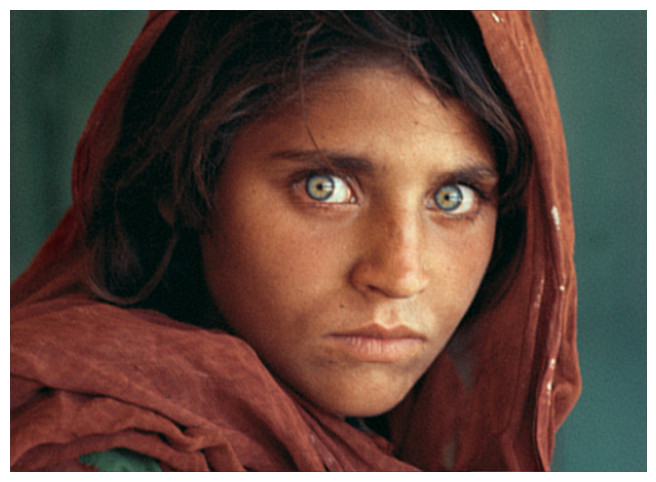

In [11]:
# Compress the image with a threshold
# Using a threshold of 10% to keep 10% of the most significant coefficients
compressed_threshold = 0.1
img_compressed = compress_image_fourier(img, threshold=compressed_threshold)
# Wyświetlanie obrazu oryginalnego i skompresowanego

plt.figure()
plt.imshow(img_compressed)
plt.axis('off')